In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kasikrit/idc-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.55G/1.55G [00:20<00:00, 79.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1


In [ ]:
import os
import shutil

# Define the common directory
common_dir = '/content/datasets/idc-dataset'

# Check if the dataset exists in common_dir
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    # Move dataset to common directory
    shutil.move('/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1', common_dir)

print(f"Dataset moved to: {common_dir}")


Dataset moved to: /content/datasets/idc-dataset


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,load_model
import os.path
import itertools
#import cv2
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD
import re
import keras
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 55505 images belonging to 2 classes.
Loading saved model:
TensorFlow: 2.17.1
FLOPS: 0.00636 G


Model: "Breast_NET"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 50, 50, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_1 (SeparableConv2D)  │ (None, 25, 25, 64)     │            283 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 25, 25, 64)     │            256 │ conv_1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pool_1_3x3            │ (None, 9, 9, 64)       │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_16       │ (None, 9, 9, 64)       │          4,224 │ max_pool_1_3x3[0][0]   │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_17       │ (None, 9, 9, 64)       │          4,736 │ max_pool_1_3x3[0][0]   │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_18       │ (None, 9, 9, 64)       │          5,760 │ max_pool_1_3x3[0][0]   │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 9, 9, 64)       │            256 │ separable_conv2d_16[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 9, 9, 64)       │            256 │ separable_conv2d_17[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 9, 9, 64)       │            256 │ separable_conv2d_18[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 9, 9, 64)       │              0 │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 9, 9, 64)       │              0 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 64)             │              0 │ activation_6[0][0]     │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_3 (Reshape)  

 Total params: 402,561 (1.54 MB)

 Trainable params: 133,397 (521.08 KB)

 Non-trainable params: 2,368 (9.25 KB)

 Optimizer params: 266,796 (1.02 MB)

None
Number of layers in the base model:  52
[0 0 0 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6939/6939 ━━━━━━━━━━━━━━━━━━━━ 144s 21ms/step
55505
55505
55505
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39793
           1       0.28      1.00      0.44     15712

    accuracy                           0.28     55505
   macro avg       0.14      0.50      0.22     55505
weighted avg       0.08      0.28      0.12     55505


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


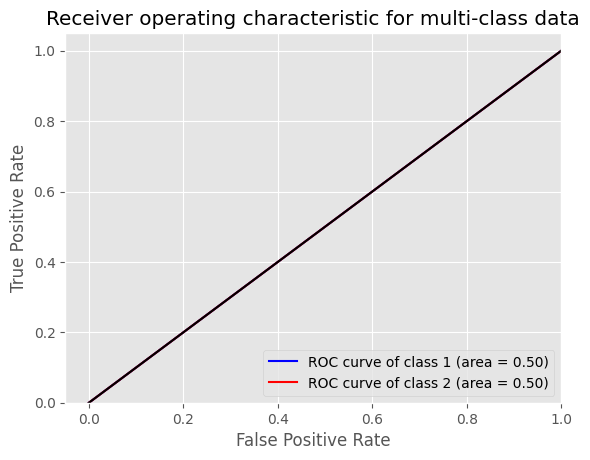

In [ ]:
valid_data_dir = '/content/datasets/idc-dataset/1/IDC/testing'

output_dir = '/content/drive/MyDrive/Outputs'
save_path = os.path.join(output_dir, 'checkpoints', 'model_idc_4.keras')

batch_size=8

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))

        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #plt.show()
    #plt.savefig('model_idcVGG16_confusion_matrix.png',bbox_inches = "tight")
    plt.close()



def get_generators():

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator  = test_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(50, 50),
        batch_size=8,
        color_mode="rgb",
        shuffle=False,
        classes=['0', '1'],
        #classes=['Grade_1', 'Grade_2', 'Grade_3'],
        # classes=['Benign', 'Malignant'],
        #classes=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma'],
        class_mode="categorical")

    return  test_generator

def predict_model(generators):
    test_generator = generators
    model = load_model(save_path)

    import tensorflow as tf
    from tensorflow.python.profiler.model_analyzer import profile
    from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
    print('TensorFlow:', tf.__version__)

    forward_pass = tf.function(
        model.call,
        input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

    graph_info = profile(forward_pass.get_concrete_function().graph,
                            options=ProfileOptionBuilder.float_operation())


    flops = graph_info.total_float_ops // 2
    print(f"FLOPS: {flops / 10 ** 9:.03} G")
    print(model.summary())
    print("Number of layers in the base model: ", len(model.layers))
    print(test_generator.classes)
    predictions = model.predict(
			test_generator,
			steps = len(test_generator.filenames) // batch_size+1 ,
			verbose = 1
			)
    pred=predictions
    predictions = np.argmax(predictions, axis=1)
    print(len(predictions))

    labels = (test_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predict = [labels[k] for k in predictions]
    filenames=test_generator.filenames
    print(len(filenames))
    print(len(predict))




    print('Confusion Matrix')
    cm=confusion_matrix(test_generator.classes, predictions)
    target_names =['0', '1']
    #target_names =['Grade_1', 'Grade_2', 'Grade_3']
    # target_names =['Benign', 'Malignant']
    #target_names=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']
    xlabels_new = [re.sub("(.{10})", "\\1\n", label, 0, re.DOTALL) for label in target_names]


    plot_confusion_matrix(cm ,
                      normalize    = False,
                      target_names =target_names,
                      title        = "Confusion Matrix")
    print('Classification Report')
    target_names = ['0', '1']
    # target_names =['Benign', 'Malignant']
    #target_names =['Grade_1', 'Grade_2', 'Grade_3']
    #target_names=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']
    print(classification_report(test_generator.classes, predictions, target_names=target_names))
    # Plotting and estimation of FPR, TPR
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle
    plt.style.use('ggplot')

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(test_generator.classes, pred[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red'])
    #colors = cycle(['blue', 'red', 'green','orange','brown','pink', 'black','yellow'])
    for i, color in zip(range(2), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()


    return model

def main(weights_file):


    generators = get_generators()

    if weights_file is None:
        print("Loading saved model:")

        model = predict_model(generators)
    else:
        print("Loading saved model: %s." % weights_file)
        model.load_weights(weights_file)




if __name__ == '__main__':
    weights_file = None
    #print(len(data.classes))
    main(weights_file)